국가 건강검진데이터-'혈압,혈당데이터'
[연도] 2013~2014년 일반검진 및 생애전환기 건강검진 데이터 1,000,000건
[항목] 연령, 수축기혈압, 이완기혈압, 공복혈당, 성별, 고혈압/당뇨병 진료여부, 체질량지수
[변수]
- BTH_G : 연령(그룹)   -> age_arrange (1:20~30, 2:31~40, 3:41~50, 4:51~60, 5:61~70, 6:71이상)
- SBP : 수축기혈압
- DBP : 이완기혈압
- FBS : 공복혈당
- SEX : 성별(남성:1, 여성:2)
- DIS : 고혈압/당뇨병 진료여부      -> (1:1+2+3 진료내역 있음, 0:4 진료내역 없음)
        고혈압/당뇨병 진료내역 있음: 1
        고혈압 진료내역 있음: 2
        당뇨병 진료내역 있음: 3
        고혈압/당뇨병 진료내역 없음: 4
- BMI : 체질량지수

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

health_df=pd.read_csv('health2.csv')
print(health_df['DIS'].value_counts())
health_df.head(3)

4    740662
2    162826
1     53398
3     43114
Name: DIS, dtype: int64


,SEX,age_arrange,BTH_G,SBP,DBP,FBS,BMI,DIS
0,1,1,1,116,78,94,16.6,4
1,1,1,1,100,60,79,22.3,4
2,1,1,1,100,60,87,21.9,4


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

health_df=pd.read_csv('health2.csv')
print('단일 컬럼 데이터 추출:\n',health_df[  'DIS' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', health_df[ ['SBP','DIS']].head(3))

X_features=health_df.iloc[:,:-1]
y_labels=health_df.iloc[:,-1]
print('피처 데이터 shape: {0}'.format(X_features.shape))
print(X_features)
print(y_labels)

단일 컬럼 데이터 추출:
 0    4
1    4
2    4
Name: DIS, dtype: int64

여러 컬럼들의 데이터 추출:
    SBP  DIS
0  116    4
1  100    4
2  100    4
피처 데이터 shape: (1000000, 7)
        SEX  age_arrange  BTH_G  SBP  DBP  FBS   BMI
0         1            1      1  116   78   94  16.6
1         1            1      1  100   60   79  22.3
2         1            1      1  100   60   87  21.9
3         1            1      1  111   70   72  20.2
4         1            1      1  120   80   98  20.0
...     ...          ...    ...  ...  ...  ...   ...
999995    2            6     27  120   70   81  23.1
999996    2            6     27  110   70  104  27.2
999997    2            6     27  115   53  110  25.2
999998    2            6     27  120   70   90  19.7
999999    2            6     27  116   73   92  17.6

[1000000 rows x 7 columns]
0         4
1         4
2         4
3         4
4         4
         ..
999995    2
999996    2
999997    1
999998    2
999999    4
Name: DIS, Length: 1000000, dtype: int64


데이터 전처리: 엑셀
1) SBP>=180 , DBP>=110 , DIS=4 삭제 (학습 시, 혈압 높아도 진료내역 없음(4)으로 학습할 수 있기 때문)
2) FBS>=126, DIS=4 삭제
3) BTH_G -> age_arrange 변경 (1:20~30, 2:31~40, 3:41~50, 4:51~60, 5:61~70, 6:71이상) 
4) DIS -> 이진분류 변경 (1:1+2+3 진료내역 있음, 0:4 진료내역 없음)
건강검진 시 수축기혈압과 이완기혈압, 공복혈당을 보았을때 이전에 고혈압/당뇨병 진료내역이 있는지 확인(높음->진료내역있음)
예측모델: 수축기혈압과 이완기혈압, 공복혈당 데이터를 받아서 그 값이 높을 경우 관리의 필요성 예측

In [85]:
health4_df=pd.read_csv('health4.csv')
print(health4_df['DIS'].value_counts())
health4_df.head(3)

0    722604
1    259338
Name: DIS, dtype: int64


,SEX,age_arrange,SBP,DBP,FBS,BMI,DIS
0,1,1,116,78,94,16.6,0
1,1,1,100,60,79,22.3,0
2,1,1,100,60,87,21.9,0


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

health4_df=pd.read_csv('health4.csv')
print('단일 컬럼 데이터 추출:\n',health4_df[  'DIS' ].head(3))
print('\n여러 컬럼들의 데이터 추출:\n', health4_df[ ['SBP','DIS']].head(3))

X=health4_df.iloc[:,:-1]
y=health4_df.iloc[:,-1]
print('피처 데이터 shape: {0}'.format(X.shape))
print(X)
print(y)

단일 컬럼 데이터 추출:
 0    0
1    0
2    0
Name: DIS, dtype: int64

여러 컬럼들의 데이터 추출:
    SBP  DIS
0  116    0
1  100    0
2  100    0
피처 데이터 shape: (981942, 6)
        SEX  age_arrange  SBP  DBP  FBS   BMI
0         1            1  116   78   94  16.6
1         1            1  100   60   79  22.3
2         1            1  100   60   87  21.9
3         1            1  111   70   72  20.2
4         1            1  120   80   98  20.0
...     ...          ...  ...  ...  ...   ...
981937    2            6  120   70   81  23.1
981938    2            6  110   70  104  27.2
981939    2            6  115   53  110  25.2
981940    2            6  120   70   90  19.7
981941    2            6  116   73   92  17.6

[981942 rows x 6 columns]
0         0
1         0
2         0
3         0
4         0
         ..
981937    1
981938    1
981939    1
981940    1
981941    0
Name: DIS, Length: 981942, dtype: int64


In [88]:
health4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981942 entries, 0 to 981941
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SEX          981942 non-null  int64  
 1   age_arrange  981942 non-null  int64  
 2   SBP          981942 non-null  int64  
 3   DBP          981942 non-null  int64  
 4   FBS          981942 non-null  int64  
 5   BMI          981942 non-null  float64
 6   DIS          981942 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 52.4 MB


In [46]:
#health2 DT
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test=train_test_split(X_features, y_labels, test_size=0.2, random_state=10)

dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
pred_prob=dt_clf.predict_proba(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도:0.6861


In [73]:
#health4 dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt4_clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

dt4_clf.fit(X_train, y_train)
pred4=dt4_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred4)))

예측 정확도:0.7714


In [74]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, roc_curve

def get_clf_eval(y_test,pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f},재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [75]:
#health4 dt
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, roc_curve

def get_clf_eval_dt(y_test,pred=None, pred_proba=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test, pred)

    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f},재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))

get_clf_eval_dt(y_test, pred4)

오차행렬
[[122159  22240]
 [ 22649  29341]]
정확도:0.7714, 정밀도:0.5688,재현율:0.5644, F1:0.5666


In [76]:
#health4 LGBM logloss 값이 낮아질수록 더 나은 예측
from lightgbm import LGBMClassifier
import pandas as pd

lgbm_wrapper=LGBMClassifier(n_estimators=100, random_state=0)

evals=[(X_train, y_train)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=40, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds4=lgbm_wrapper.predict(X_test)
pred_proba4=lgbm_wrapper.predict_proba(X_test)[:,-1] 

[1]	training's binary_logloss: 0.538724
Training until validation scores don't improve for 40 rounds
[2]	training's binary_logloss: 0.509487
[3]	training's binary_logloss: 0.486199
[4]	training's binary_logloss: 0.467097
[5]	training's binary_logloss: 0.451297
[6]	training's binary_logloss: 0.437881
[7]	training's binary_logloss: 0.426563
[8]	training's binary_logloss: 0.416808
[9]	training's binary_logloss: 0.408474
[10]	training's binary_logloss: 0.401255
[11]	training's binary_logloss: 0.394969
[12]	training's binary_logloss: 0.389464
[13]	training's binary_logloss: 0.384685
[14]	training's binary_logloss: 0.380488
[15]	training's binary_logloss: 0.376811
[16]	training's binary_logloss: 0.373558
[17]	training's binary_logloss: 0.370693
[18]	training's binary_logloss: 0.368225
[19]	training's binary_logloss: 0.366037
[20]	training's binary_logloss: 0.36411
[21]	training's binary_logloss: 0.362372
[22]	training's binary_logloss: 0.360808
[23]	training's binary_logloss: 0.359424
[24]	t

In [77]:
#health4 LGBM logloss 값이 낮아질수록 더 나은 예측
from lightgbm import LGBMClassifier
import pandas as pd

lgbm_wrapper=LGBMClassifier(n_estimators=400, random_state=0)

evals=[(X_train, y_train)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals, verbose=True)
preds4=lgbm_wrapper.predict(X_test)
pred_proba4=lgbm_wrapper.predict_proba(X_test)[:,-1] 

[1]	training's binary_logloss: 0.538724
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.509487
[3]	training's binary_logloss: 0.486199
[4]	training's binary_logloss: 0.467097
[5]	training's binary_logloss: 0.451297
[6]	training's binary_logloss: 0.437881
[7]	training's binary_logloss: 0.426563
[8]	training's binary_logloss: 0.416808
[9]	training's binary_logloss: 0.408474
[10]	training's binary_logloss: 0.401255
[11]	training's binary_logloss: 0.394969
[12]	training's binary_logloss: 0.389464
[13]	training's binary_logloss: 0.384685
[14]	training's binary_logloss: 0.380488
[15]	training's binary_logloss: 0.376811
[16]	training's binary_logloss: 0.373558
[17]	training's binary_logloss: 0.370693
[18]	training's binary_logloss: 0.368225
[19]	training's binary_logloss: 0.366037
[20]	training's binary_logloss: 0.36411
[21]	training's binary_logloss: 0.362372
[22]	training's binary_logloss: 0.360808
[23]	training's binary_logloss: 0.359424
[24]	

[198]	training's binary_logloss: 0.344748
[199]	training's binary_logloss: 0.344731
[200]	training's binary_logloss: 0.344713
[201]	training's binary_logloss: 0.344695
[202]	training's binary_logloss: 0.344673
[203]	training's binary_logloss: 0.344656
[204]	training's binary_logloss: 0.344619
[205]	training's binary_logloss: 0.344599
[206]	training's binary_logloss: 0.344579
[207]	training's binary_logloss: 0.344562
[208]	training's binary_logloss: 0.344549
[209]	training's binary_logloss: 0.344536
[210]	training's binary_logloss: 0.344529
[211]	training's binary_logloss: 0.344518
[212]	training's binary_logloss: 0.344508
[213]	training's binary_logloss: 0.344492
[214]	training's binary_logloss: 0.344482
[215]	training's binary_logloss: 0.344461
[216]	training's binary_logloss: 0.344446
[217]	training's binary_logloss: 0.344423
[218]	training's binary_logloss: 0.344404
[219]	training's binary_logloss: 0.344393
[220]	training's binary_logloss: 0.344384
[221]	training's binary_logloss: 0

[394]	training's binary_logloss: 0.34209
[395]	training's binary_logloss: 0.342077
[396]	training's binary_logloss: 0.342064
[397]	training's binary_logloss: 0.342056
[398]	training's binary_logloss: 0.34204
[399]	training's binary_logloss: 0.342026
[400]	training's binary_logloss: 0.34201
Did not meet early stopping. Best iteration is:
[400]	training's binary_logloss: 0.34201


In [78]:
#health4 LGBM
get_clf_eval(y_test, preds4, pred_proba4)

오차행렬
[[133881  10518]
 [ 21992  29998]]
정확도:0.8345, 정밀도:0.7404,재현율:0.5770, F1:0.6486, AUC:0.8887


In [79]:
#health4 LogisticRegression
X=health4_df.iloc[:,:-1]
y=health4_df.iloc[:,-1]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
pred_lr=lr_clf.predict(X_test)
pred_proba_lr=lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred_lr, pred_proba_lr)

오차행렬
[[133237  11284]
 [ 22645  29223]]
정확도:0.8272, 정밀도:0.7214,재현율:0.5634, F1:0.6327, AUC:0.8792


In [54]:
#health2 DT GridSearchCV 최적의 하이퍼 파라미터 찾기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

health_df=pd.read_csv('health2.csv')
X_features=health_df.iloc[:,:-1]
y_labels=health_df.iloc[:,-1]

dt_clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test=train_test_split(X_features, y_labels, test_size=0.2, random_state=10)

params={'max_depth':[6,8,10,12], 'min_samples_split':[800, 1000, 1500, 2000]}

In [55]:
#health2
grid_dtree=GridSearchCV(dt_clf, param_grid=params, cv=5, refit=True)

grid_dtree.fit(X_train, y_train)

scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score',
           'split3_test_score','split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 6, 'min_samples_split': 800}",0.772786,13,0.772981,0.773050,0.773925,0.772212,0.771763
1,"{'max_depth': 6, 'min_samples_split': 1000}",0.772786,13,0.772981,0.773050,0.773925,0.772212,0.771763
2,"{'max_depth': 6, 'min_samples_split': 1500}",0.772729,16,0.772906,0.773025,0.773925,0.772025,0.771763
3,"{'max_depth': 6, 'min_samples_split': 2000}",0.772729,15,0.772938,0.772956,0.773813,0.772025,0.771913
4,"{'max_depth': 8, 'min_samples_split': 800}",0.774839,10,0.774994,0.774606,0.775806,0.773919,0.774869
5,"{'max_depth': 8, 'min_samples_split': 1000}",0.774894,9,0.775038,0.774631,0.775900,0.773962,0.774937
6,"{'max_depth': 8, 'min_samples_split': 1500}",0.774581,11,0.774575,0.774244,0.775675,0.773475,0.774937
7,"{'max_depth': 8, 'min_samples_split': 2000}",0.774539,12,0.774675,0.774081,0.775575,0.773406,0.774956
8,"{'max_depth': 10, 'min_samples_split': 800}",0.775465,3,0.775937,0.775062,0.776344,0.774625,0.775356
9,"{'max_depth': 10, 'min_samples_split': 1000}",0.775702,2,0.776106,0.775425,0.776537,0.774775,0.775669


In [56]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 12, 'min_samples_split': 1000}
GridSearchCV 최고 정확도:0.7758


In [80]:
#health4 DT GridSearchCV 최적의 하이퍼 파라미터 찾기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

X=health4_df.iloc[:,:-1]
y=health4_df.iloc[:,-1]

dt4_clf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

params={'max_depth':[10,30,50,100], 'min_samples_split':[1500, 2000, 2500, 3000]}

In [81]:
grid_dtree4=GridSearchCV(dt4_clf, param_grid=params, cv=3, refit=True)

grid_dtree4.fit(X_train, y_train)

scores4_df=pd.DataFrame(grid_dtree4.cv_results_)
scores4_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 10, 'min_samples_split': 1500}",0.833352,14,0.833718,0.833291,0.833046
1,"{'max_depth': 10, 'min_samples_split': 2000}",0.833377,13,0.833688,0.833199,0.833245
2,"{'max_depth': 10, 'min_samples_split': 2500}",0.833311,15,0.833631,0.833084,0.833218
3,"{'max_depth': 10, 'min_samples_split': 3000}",0.833152,16,0.833642,0.833088,0.832725
4,"{'max_depth': 30, 'min_samples_split': 1500}",0.833519,7,0.834009,0.833543,0.833004
5,"{'max_depth': 30, 'min_samples_split': 2000}",0.833563,1,0.834089,0.833398,0.833203
6,"{'max_depth': 30, 'min_samples_split': 2500}",0.833550,4,0.834039,0.833497,0.833115
7,"{'max_depth': 30, 'min_samples_split': 3000}",0.833428,10,0.834112,0.833512,0.832661
8,"{'max_depth': 50, 'min_samples_split': 1500}",0.833519,7,0.834009,0.833543,0.833004
9,"{'max_depth': 50, 'min_samples_split': 2000}",0.833563,1,0.834089,0.833398,0.833203


In [82]:
print('GridSearchCV 최적 파라미터:', grid_dtree4.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree4.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 30, 'min_samples_split': 2000}
GridSearchCV 최고 정확도:0.8336


In [60]:
grid_dtree4=GridSearchCV(dt4_clf, param_grid=params, cv=5, refit=True)

grid_dtree4.fit(X_train, y_train)

scores4_df=pd.DataFrame(grid_dtree4.cv_results_)
scores4_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score',
            'split3_test_score','split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 10, 'min_samples_split': 1500}",0.833088,15,0.834385,0.833691,0.831342,0.833111,0.832913
1,"{'max_depth': 10, 'min_samples_split': 2000}",0.833093,14,0.834588,0.833583,0.831336,0.833085,0.832875
2,"{'max_depth': 10, 'min_samples_split': 2500}",0.833126,10,0.834518,0.833697,0.831406,0.833181,0.832831
3,"{'max_depth': 10, 'min_samples_split': 3000}",0.833004,16,0.834289,0.833895,0.831399,0.832926,0.832512
4,"{'max_depth': 30, 'min_samples_split': 1500}",0.833349,7,0.834843,0.833175,0.832010,0.833811,0.832907
5,"{'max_depth': 30, 'min_samples_split': 2000}",0.833403,4,0.834805,0.833131,0.832354,0.833626,0.833098
6,"{'max_depth': 30, 'min_samples_split': 2500}",0.833410,1,0.834665,0.833360,0.832501,0.833607,0.832920
7,"{'max_depth': 30, 'min_samples_split': 3000}",0.833123,11,0.834429,0.833544,0.831667,0.833422,0.832550
8,"{'max_depth': 50, 'min_samples_split': 1500}",0.833349,7,0.834843,0.833175,0.832010,0.833811,0.832907
9,"{'max_depth': 50, 'min_samples_split': 2000}",0.833403,4,0.834805,0.833131,0.832354,0.833626,0.833098


In [61]:
print('GridSearchCV 최적 파라미터:', grid_dtree4.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree4.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 30, 'min_samples_split': 2500}
GridSearchCV 최고 정확도:0.8334


In [22]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test , pred_rf)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_rf))

랜덤 포레스트 정확도: 0.8149


In [43]:
#RandomForest GridSearchCV
from sklearn.model_selection import GridSearchCV

parameter = {
    'n_estimators':[100],
    'max_depth' : [10,30,50,100],
    'min_samples_split' : [500,1000, 1200]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=parameter, cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 30, 'min_samples_split': 500, 'n_estimators': 100}
최고 예측 정확도: 0.8348


In [62]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=30,
                                 min_samples_split=500, random_state=0)
rf_clf1.fit(X_train , y_train)
pred_rf1 = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred_rf1)))

예측 정확도: 0.8344


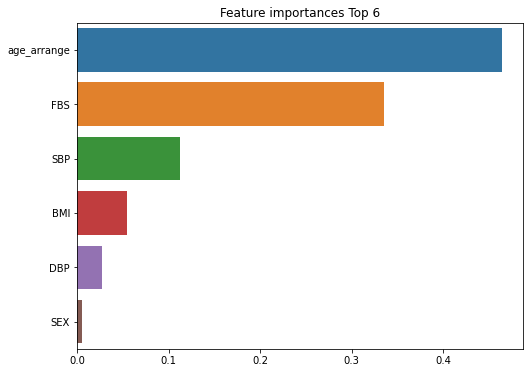

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top6 = ftr_importances.sort_values(ascending=False)[:6]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 6')
sns.barplot(x=ftr_top6 , y = ftr_top6.index)
plt.show()

In [65]:
#stacking
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train,X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
knn_clf4=KNeighborsClassifier(n_neighbors=4)
rf_clf4=RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf4=DecisionTreeClassifier()
ada_clf4=AdaBoostClassifier(n_estimators=100)

#스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final=LogisticRegression(C=10)

In [26]:
knn_clf4.fit(X_train, y_train)
rf_clf4.fit(X_train, y_train)
dt_clf4.fit(X_train, y_train)
ada_clf4.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
knn_pred4=knn_clf4.predict(X_test)
rf_pred4=rf_clf4.predict(X_test)
dt_pred4=dt_clf4.predict(X_test)
ada_pred4=ada_clf4.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred4)))
print('RandomForest 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred4)))
print('DecisionTree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred4)))
print('AdaBoost 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred4)))

KNN 정확도: 0.8092
RandomForest 정확도: 0.8149
DecisionTree 정확도: 0.7720
AdaBoost 정확도: 0.8323


In [28]:
predict=np.array([knn_pred4, rf_pred4, dt_pred4, ada_pred4])
print(predict.shape)

predict=np.transpose(predict)
print(predict.shape)

(4, 196389)
(196389, 4)


In [36]:
lr_final.fit(predict, y_test)
final=lr_final.predict(predict)

print('최종 메타모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타모델의 예측 정확도: 0.8285


In [34]:
lr_final.fit(predict, y_train)
final=lr_final.predict(predict)

print('최종 메타모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

#이 시점에서 oversampling(smote방법)해서 맞춰도 되는건지...->걍 y_test 로 하면 됨~!

ValueError: Found input variables with inconsistent numbers of samples: [196389, 785553]

In [69]:
print('RandomForest\n')
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

RandomForest

최적 하이퍼 파라미터:
 {'max_depth': 30, 'min_samples_split': 500, 'n_estimators': 100}
최고 예측 정확도: 0.8348


#Ridge회귀

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

health4_df=pd.read_csv('health4.csv')

X=health4_df.iloc[:,:-1]
y=health4_df.iloc[:,-1]


print('Boston 데이터 세트 크기:',health4_df.shape)


ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X, y, scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE :{0:.3f} '.format(avg_rmse))


Boston 데이터 세트 크기: (981942, 7)
5 folds 의 개별 Negative MSE scores:  [-0.052 -0.167 -0.131 -0.104 -0.206]
5 folds 의 개별 RMSE scores:  [0.227 0.409 0.362 0.322 0.454]
5 folds 의 평균 RMSE :0.355 


In [97]:
alphas=[0,0.1,1,10,100,150, 200]

for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    
    neg_mse_scores=cross_val_score(ridge, X, y, scoring="neg_mean_squared_error",cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일때 5 folds 의 평균 RMSE: 0.355
alpha 0.1일때 5 folds 의 평균 RMSE: 0.355
alpha 1일때 5 folds 의 평균 RMSE: 0.355
alpha 10일때 5 folds 의 평균 RMSE: 0.355
alpha 100일때 5 folds 의 평균 RMSE: 0.355
alpha 150일때 5 folds 의 평균 RMSE: 0.355
alpha 200일때 5 folds 의 평균 RMSE: 0.355


IndexError: index 5 is out of bounds for axis 0 with size 5

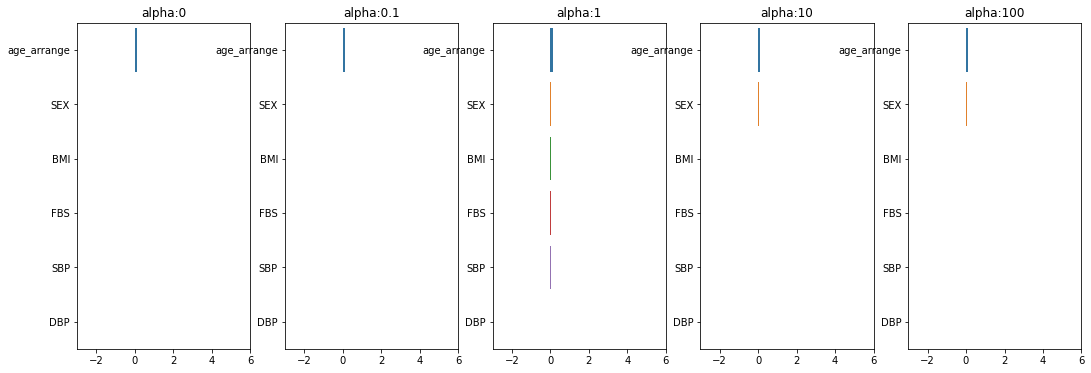

In [98]:
fig, axs= plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df=pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X, y)
    coeff=pd.Series(data=ridge.coef_, index=X.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [99]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:150
age_arrange,0.112998,0.112998,0.112998,0.112998,0.112993,0.112990
SEX,0.024660,0.024660,0.024660,0.024659,0.024652,0.024647
BMI,0.011413,0.011413,0.011413,0.011413,0.011412,0.011412
FBS,0.005671,0.005671,0.005671,0.005671,0.005671,0.005671
SBP,0.004618,0.004618,0.004618,0.004618,0.004618,0.004618
DBP,-0.000738,-0.000738,-0.000738,-0.000738,-0.000738,-0.000739


#Lasso회귀

In [100]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,verbose=True):
    coeff_df=pd.DataFrame()
    if verbose: print('####### ', model_name, "#######")
    for param in params:
        if model_name=='Ridge':model=Ridge(alpha=param)
        elif model_name=='Lasso':model=Lasso(alpha=param)
        elif model_name=='ElasticNet':model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        model.fit(X, y)
        coeff=pd.Series(data=model.coef_, index=X.columns)
        colname='alpha:'+str(param)
        coeff_df[colname]=coeff
    return coeff_df

In [105]:
rigge_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X, y_target_n=y)

#######  Ridge #######
alpha 0일때 5 폴드 세트의 평균 RMSE: 0.355
alpha 0.1일때 5 폴드 세트의 평균 RMSE: 0.355
alpha 1일때 5 폴드 세트의 평균 RMSE: 0.355
alpha 10일때 5 폴드 세트의 평균 RMSE: 0.355
alpha 100일때 5 폴드 세트의 평균 RMSE: 0.355


In [101]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X, y_target_n=y)

#######  Lasso #######
alpha 0.07일때 5 폴드 세트의 평균 RMSE: 0.361
alpha 0.1일때 5 폴드 세트의 평균 RMSE: 0.369
alpha 0.5일때 5 폴드 세트의 평균 RMSE: 0.400
alpha 1일때 5 폴드 세트의 평균 RMSE: 0.406
alpha 3일때 5 폴드 세트의 평균 RMSE: 0.438


In [102]:
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
age_arrange,0.077934,0.062174,0.000000,0.000000,0.000000
FBS,0.006104,0.006309,0.006445,0.005604,0.001561
SBP,0.005128,0.005563,0.005388,0.003245,0.000000
BMI,0.003931,0.000976,0.000000,0.000000,0.000000
SEX,0.000000,0.000000,0.000000,0.000000,0.000000
DBP,-0.000000,-0.000000,0.000000,0.000000,0.000000


#엘라스틱넷회귀

In [103]:
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X, y_target_n=y)

#######  ElasticNet #######
alpha 0.07일때 5 폴드 세트의 평균 RMSE: 0.357
alpha 0.1일때 5 폴드 세트의 평균 RMSE: 0.361
alpha 0.5일때 5 폴드 세트의 평균 RMSE: 0.398
alpha 1일때 5 폴드 세트의 평균 RMSE: 0.402
alpha 3일때 5 폴드 세트의 평균 RMSE: 0.424


In [104]:
sort_column='alpha:'+str(elastic_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
age_arrange,0.077934,0.062174,0.000000,0.000000,0.000000
FBS,0.006104,0.006309,0.006445,0.005604,0.001561
SBP,0.005128,0.005563,0.005388,0.003245,0.000000
BMI,0.003931,0.000976,0.000000,0.000000,0.000000
SEX,0.000000,0.000000,0.000000,0.000000,0.000000
DBP,-0.000000,-0.000000,0.000000,0.000000,0.000000


#독립변수간 영향력 이미 최소화, 회귀계수가 규제를 할 만큼의 영향력을 가진게 없음-> 규제선형모델을 사용 할 필요가 없음
#(회귀를 돌려도 되지만 굳이 규제 줄 필요X)